In [1]:
import sys
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
#first we load the game data that we have and store it in games
games = pandas.read_csv('games.csv')

    

In [3]:
print(games.columns)
print(games.shape)
#we find the number of columns and the shape

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


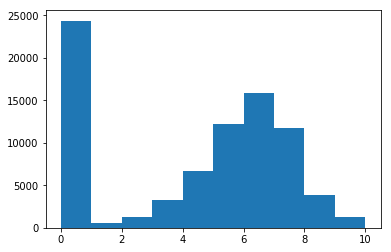

In [4]:
#we see we have 20 columns and 81312 rows
#For a visual representation of data make a histogram for average rating column
plt.hist(games['average_rating'])
plt.show()

In [5]:
#First we print the first row of all the games with zero scores and we can see we have so many games with 
#zero ratings in between 20000 and 25000
print(games[games["average_rating"]==0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [6]:
#we will compare with first row of game with rating greater than zero to compare
print(games[games["average_rating"]>0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


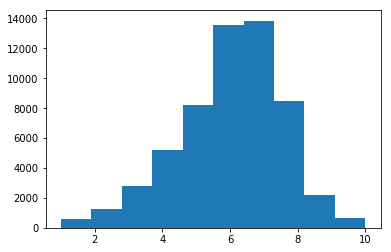

In [7]:
#We will remove any rows which don't have any user reviews
#So basically as someone has played or reviewed the game it is considered okay 
games = games[games["users_rated"]>0]
#we also want to remove any rows with missing values
games = games.dropna(axis=0)

#now we will remove the average ratings
plt.hist(games["average_rating"])
plt.show()

In [8]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


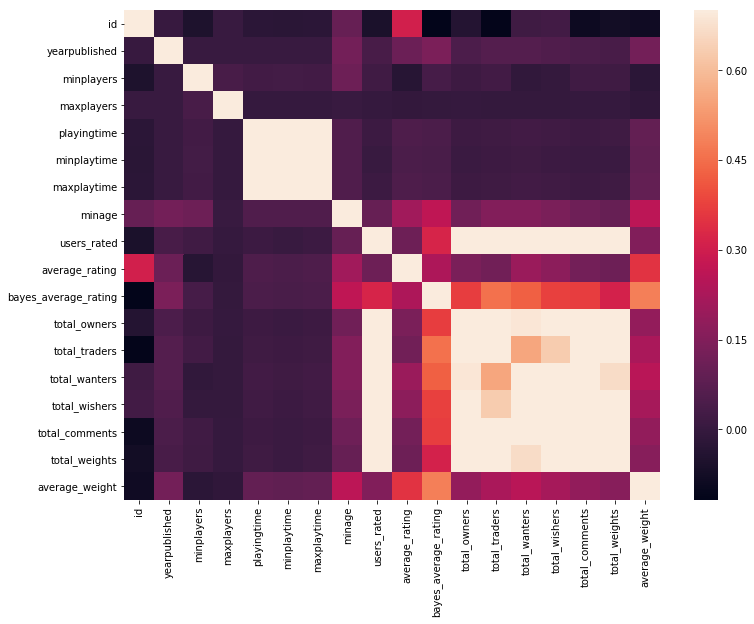

In [9]:
#now we will make the corelation matrix to see the corelation between the classes
corrmat = games.corr()
fig= plt.figure(figsize = (12,9))

#now we plot the heatmat of the corrmat to see
sns.heatmap(corrmat,vmax=0.7)
plt.show()

In [12]:
#we store all the column names in column
columns = games.columns.tolist()

In [13]:
print(columns)

['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [14]:
#we now remove all the column that we do not need
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","type","name","id"]]
# we do not need bayes as based on average rating, average rating is in training set, we also remove type,name and id

#now we store the variable we will be prediciting on
target = "average_rating"

In [16]:
#to generate training and test datasets


#now we generate the training set
train = games.sample(frac=0.7, random_state = 2)

#now we will select anything not in train set and put in test
test = games.loc[~games.index.isin(train.index)]
print(train.shape)
print(test.shape)
#printing the shapes



(39826, 20)
(17068, 20)


In [17]:
#Now we will import the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Initialize the model class
LR= LinearRegression()
LR.fit(train[columns],train[target])
#we fit the model with the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#Now we generate predictions for the test set
predictions = LR.predict(test[columns])

#now we compute the error between test predictions and actual values
mean_squared_error(predictions,test[target])

2.0973417688243936

In [21]:
#since the mean squared error is high model is not linear and we will be using a non linear model like random forest
#now we will import the random foresr model

from sklearn.ensemble import RandomForestRegressor
#we now initialize the model
RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state=2)

#We fit the data
RFR.fit(train[columns],train[target])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [22]:
#Now we generate predictions for the test set
predictions = RFR.predict(test[columns])

#now we compute the error between test predictions and actual values
mean_squared_error(predictions,test[target])

1.451531643042825

In [26]:
#let us take a random value and check our prediciton
#let say for the 1000th game
#the prediction for both models are as follows
rating_LR = LR.predict(test[columns].iloc[1000].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[1000].values.reshape(1,-1))
#print the predictions
print("Rating using LR",rating_LR)
print("Rating using RFR",rating_RFR)

#printing actual value
test[target].iloc[1000]



Rating using LR [6.22964255]
Rating using RFR [6.50938846]


6.30765